In [7]:
%matplotlib inline

import scipy.constants
import numpy as np
import matplotlib.pyplot as plt
import math

0.2 a The Friis free space equation consists of:

$$P_r = P_t + 20 \times \log^{10}{\frac{c}{4\pi f r}}$$

where P_t equals the transmission power, c the speed of sound, f the frequency and r the distance. Plotting this for f is 2.4Ghz and r between 0.4 and 30 metres results in the following plot:

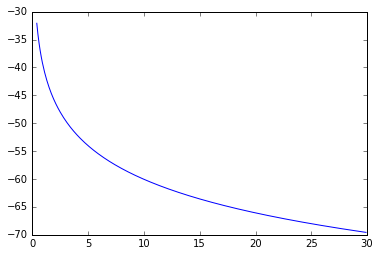

In [8]:
c  = scipy.constants.speed_of_light
f  = 2.4e9
r  = np.arange(0.4, 30, 0.1)
Pt = 0
P  = Pt + 20 * np.log10(c/(4.* np.pi * f * r))

plt.figure(1)
plt.plot(r,P)
plt.show()

b: This equation can also be inverted to r as a function of P_r:
    
$$r = \frac{c}{4 \pi f 10^{\frac{P_r - P_t}{20}}}$$

In [38]:
def getDistance(Pr):
    return c/(4*np.pi*f*math.pow(10, (Pr-Pt)/20))

d30 = getDistance(-31) - getDistance(-30)
d60 = getDistance(-61) - getDistance(-60)

print("The difference in metres between -30 to -31 and -60 to -61 is:", d30, "and", d60)

The difference in metres between -30 to -31 and -60 to -61 is: 0.03835527636485858 and 1.2129003359817592


c: As can be seen above, the difference in distance between 30 and 31 dBm is 0.0384 metres and between -60 and -61 dBm is 1.21 metres. This that with a lower signal strength the difference in strength has a larger influence on the difference in distance.

d: This also means that the uncertainty for the distance is larger when the signal strength is smaller. As an error in the measured signal strength has a larger influance on the resulting calculated distance.

0.3 e: In order to reconstruct the location of the client triangulation can be used. There excists unfortunatly no exact solution as can be seen in the picture below:

**MARTIJN PLAATJE PAINT :D**

f: To Calculate the signal strength of a client at a certain location with a certain router the original formula can be rewritten to:

$$P_r = P_t + 20 \times \log^{10}({\frac{c}{4\pi f r}})$$
$$P_r = P_t + 20 \times (\log^{10}({\frac{c}{4\pi f}}) - \log^{10}({r}))$$
$$P_r = P_t + 20 \times (\log^{10}({\frac{c}{4\pi f}}) - \log^{10}(\sqrt{(x-x_i)^2 + (y-y_i)^2 + Z^2}))$$
$$P_r = P_t + 20 \times \log^{10}({\frac{c}{4\pi f}}) - 20 \times \log^{10}(\sqrt{(x-x_i)^2 + (y-y_i)^2 + Z^2})$$
$$P_r = P_t + 20 \times \log^{10}({\frac{c}{4\pi f}}) - 20 \times \log^{10}(((x-x_i)^2 + (y-y_i)^2 + Z^2)^\frac{1}{2})$$
$$P_r = P_t + 20 \times \log^{10}({\frac{c}{4\pi f}}) - 10 \times \log^{10}((x-x_i)^2 + (y-y_i)^2 + Z^2)$$



g: **LEG RESULTATEN ONDER UIT**

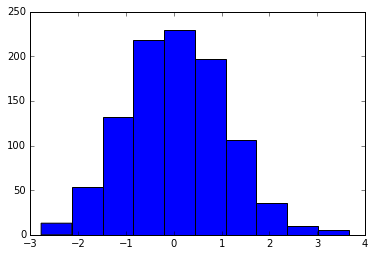

The mean and deviation are: 0.0535894532869 and 1.02741029967


In [42]:
def getExpectedStrength(x, y, xi, yi, Z, Pt):
    return (Pt + 20 * np.log10(c/(4*np.pi*f)) -
            10*np.log10(math.pow(x-xi,2) + math.pow(y-yi,2) + math.pow(Z,2)))

def getMeassuredStrength(x, y, xi, yi, Z, Pt, G, sigma):
    return (Pt + G * np.log10(c/(4*np.pi*f)) -
            10*np.log10(math.pow(x-xi,2) + math.pow(y-yi,2) + math.pow(Z,2)) +
            np.random.normal(0, sigma))
Z = 2
G = 20

sigma = 1
expectedStrength = getExpectedStrength(20, 0, 0, 0, Z, 0)
meassurements = [getMeassuredStrength(20, 0, 0, 0, Z, 0, G, sigma) for x in range(1000)]
nRisiduals = (meassurements - expectedStrength)/sigma
plt.hist(nRisiduals, bins=10)
plt.show()

mean = np.mean(nRisiduals)
mu = np.std(nRisiduals)

print("The mean and deviation are:", mean, "and", mu)

h: **LEG RESULTATEN ONDER UIT**

The mean and deviation when underestimating are: -0.0780299774774 and 1.94487061556


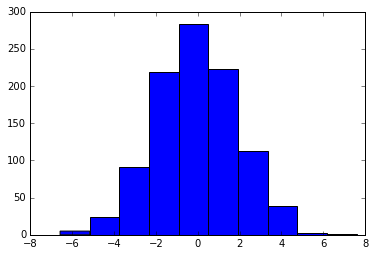

The mean and deviation when overestimating are: -0.0195074943694 and 0.48621765389


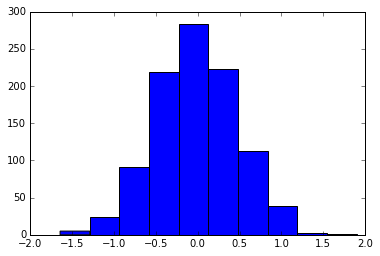

In [43]:
sigma = 2
expectedStrength = getExpectedStrength(20, 0, 0, 0, Z, 0)
meassurements = [getMeassuredStrength(20, 0, 0, 0, Z, 0, G, sigma) for x in range(1000)]

# Underestimate
nRisiduals = (meassurements - expectedStrength)/1
mean = np.mean(nRisiduals)
mu = np.std(nRisiduals)
print("The mean and deviation when underestimating are:", mean, "and", mu)
plt.hist(nRisiduals, bins=10)
plt.show()

# Overestimate
nRisiduals = (meassurements - expectedStrength)/4
mean = np.mean(nRisiduals)
mu = np.std(nRisiduals)
print("The mean and deviation when overestimating are:", mean, "and", mu)
plt.hist(nRisiduals, bins=10)
plt.show()

i: **EXPLAINED RESULTS BELOW** (mean is no longer 0 due to systematic error)

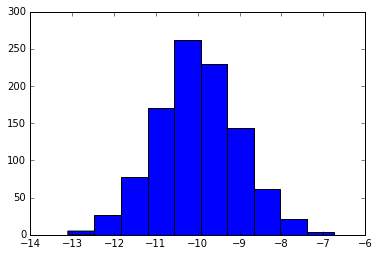

The mean and deviation are: -10.0057294478 and 0.976872468461


In [41]:
G = 25

sigma = 1
expectedStrength = getExpectedStrength(20, 0, 0, 0, Z, 0)
meassurements = [getMeassuredStrength(20, 0, 0, 0, Z, 0, G, sigma) for x in range(1000)]
nRisiduals = (meassurements - expectedStrength)/sigma
plt.hist(nRisiduals, bins=10)
plt.show()

mean = np.mean(nRisiduals)
mu = np.std(nRisiduals)

print("The mean and deviation are:", mean, "and", mu)

j: mean of zero and a standard deviation of one? **CHECK PLS**

0.4 k: 